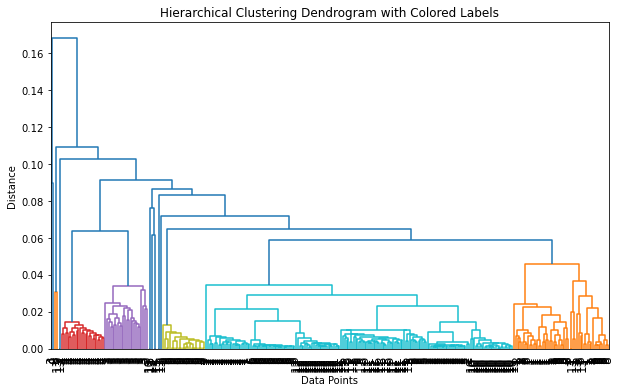

Cluster Labels: [13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13  8 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12  1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  2  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5 10 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12  3 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13 13 13  4 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11  7 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 10 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 13 13  3 13 13  4  7  8  9 14]
Adjusted Rand Index: 0.23983272431882327

In [29]:
import os
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Specify the directory containing your files
directory_path = "all_pd"

# Initialize the master list
master_list = []
labels_list = []  # List to store labels

# Iterate through each file in the directory
for i, filename in enumerate(os.listdir(directory_path)):
    if filename.endswith('.hist'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Load the data from the file
        data = np.loadtxt(file_path)

        # Extract the second column into a list and append to the master list
        second_column = data[:, 1].tolist()
        master_list.append(second_column)

        # Assign labels based on the condition
        label = (i // 25) % 13 + 1
        labels_list.append(label)

# Convert the master list to a NumPy array
master_array = np.array(master_list)

# Perform hierarchical clustering
linkage_matrix = linkage(master_array, method='average')  # You can choose a different method

color_threshold=0.05

# Plot the dendrogram with colored labels
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=labels_list, color_threshold=color_threshold, leaf_font_size=12)  # Adjust the color_threshold as needed
plt.title('Hierarchical Clustering Dendrogram with Colored Labels')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Get cluster labels based on the chosen color_threshold
clusters = fcluster(linkage_matrix, t=color_threshold, criterion='distance')

# Display the cluster labels
print("Cluster Labels:", clusters)

# Calculate the Adjusted Rand Index
ari = adjusted_rand_score(labels_list, clusters)
# Print the Adjusted Rand Index
print("Adjusted Rand Index:", ari)


Epoch 1/50
10/10 [==============================] - 0s 632us/step - loss: 0.2390
Epoch 2/50
10/10 [==============================] - 0s 485us/step - loss: 0.2362
Epoch 3/50
10/10 [==============================] - 0s 521us/step - loss: 0.2331
Epoch 4/50
10/10 [==============================] - 0s 509us/step - loss: 0.2298
Epoch 5/50
10/10 [==============================] - 0s 483us/step - loss: 0.2261
Epoch 6/50
10/10 [==============================] - 0s 454us/step - loss: 0.2220
Epoch 7/50
10/10 [==============================] - 0s 481us/step - loss: 0.2176
Epoch 8/50
10/10 [==============================] - 0s 508us/step - loss: 0.2128
Epoch 9/50
10/10 [==============================] - 0s 458us/step - loss: 0.2076
Epoch 10/50
10/10 [==============================] - 0s 399us/step - loss: 0.2021
Epoch 11/50
10/10 [==============================] - 0s 367us/step - loss: 0.1963
Epoch 12/50
10/10 [==============================] - 0s 406us/step - loss: 0.1901
Epoch 13/50
10/10 [======

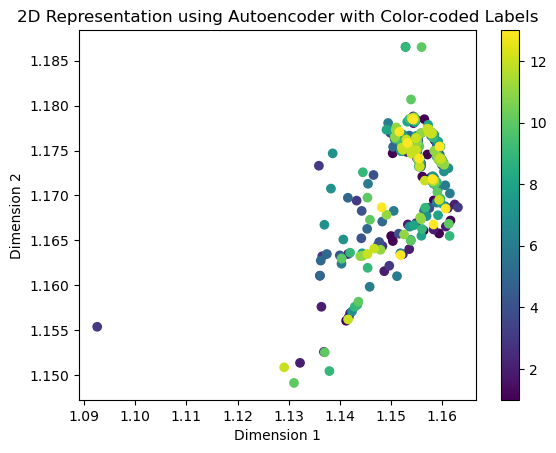

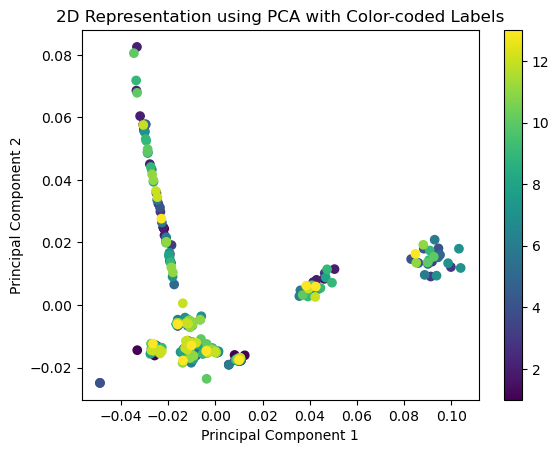

In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Convert the master list to a NumPy array
master_array = np.array(master_list)

# Define the autoencoder model
input_size = master_array.shape[1]
encoding_dim = 2  # 2D representation for autoencoder

input_data = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_data)
decoded = Dense(input_size, activation='sigmoid')(encoded)

autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(master_array, master_array, epochs=50, batch_size=32, shuffle=True)

# Create a separate encoder model to get 2D representations
encoder = Model(input_data, encoded)
encoded_data_autoencoder = encoder.predict(master_array)

# Apply PCA for 2D representation
pca = PCA(n_components=2)
pca_result = pca.fit_transform(master_array)

# Plot the 2D representation using autoencoder with color-coded labels
plt.scatter(encoded_data_autoencoder[:, 0], encoded_data_autoencoder[:, 1], c=labels_list, cmap='viridis')
plt.colorbar()
plt.title('2D Representation using Autoencoder with Color-coded Labels')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

# Plot the 2D representation using PCA with color-coded labels
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels_list, cmap='viridis')
plt.colorbar()
plt.title('2D Representation using PCA with Color-coded Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Epoch 1/50
10/10 [==============================] - 0s 658us/step - loss: 0.2392
Epoch 2/50
10/10 [==============================] - 0s 591us/step - loss: 0.2366
Epoch 3/50
10/10 [==============================] - 0s 613us/step - loss: 0.2338
Epoch 4/50
10/10 [==============================] - 0s 624us/step - loss: 0.2306
Epoch 5/50
10/10 [==============================] - 0s 522us/step - loss: 0.2271
Epoch 6/50
10/10 [==============================] - 0s 580us/step - loss: 0.2232
Epoch 7/50
10/10 [==============================] - 0s 550us/step - loss: 0.2189
Epoch 8/50
10/10 [==============================] - 0s 504us/step - loss: 0.2142
Epoch 9/50
10/10 [==============================] - 0s 521us/step - loss: 0.2091
Epoch 10/50
10/10 [==============================] - 0s 521us/step - loss: 0.2036
Epoch 11/50
10/10 [==============================] - 0s 492us/step - loss: 0.1977
Epoch 12/50
10/10 [==============================] - 0s 473us/step - loss: 0.1915
Epoch 13/50
10/10 [======

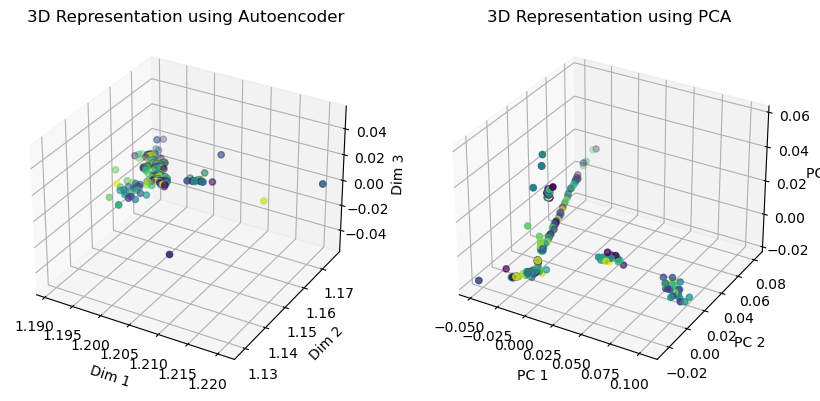

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from mpl_toolkits.mplot3d import Axes3D

# Convert the master list to a NumPy array
master_array = np.array(master_list)

# Define the autoencoder model
input_size = master_array.shape[1]
encoding_dim = 3  # 3D representation for autoencoder

input_data = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_data)
decoded = Dense(input_size, activation='sigmoid')(encoded)

autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(master_array, master_array, epochs=50, batch_size=32, shuffle=True)

# Create a separate encoder model to get 3D representations
encoder = Model(input_data, encoded)
encoded_data_autoencoder = encoder.predict(master_array)

# Apply PCA for 3D representation
pca = PCA(n_components=3)
pca_result = pca.fit_transform(master_array)

# Plot the 3D representation using autoencoder with color-coded labels
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(encoded_data_autoencoder[:, 0], encoded_data_autoencoder[:, 1], encoded_data_autoencoder[:, 2], c=labels_list, cmap='viridis')
ax1.set_title('3D Representation using Autoencoder')
ax1.set_xlabel('Dim 1')
ax1.set_ylabel('Dim 2')
ax1.set_zlabel('Dim 3')

# Plot the 3D representation using PCA with color-coded labels
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], c=labels_list, cmap='viridis')
ax2.set_title('3D Representation using PCA')
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_zlabel('PC 3')

plt.show()


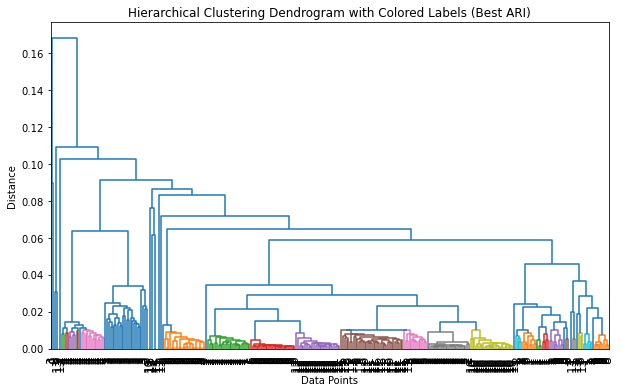

Best Color Threshold: 0.01
Best Adjusted Rand Index: 0.6947731913430367
Cluster Labels: [58 59 59 50 50 52 62 50 51 62 53 51 62 53 53 53 51 52 51 52 54 54 62 51
 62 37 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47 47
 47 47  1 35 32 31 23 33 24 34 16 18 14 28 25 27 29 12 13 21 22 15 26 30
 19 20 17  2 10 10 10  9  6  7 10  6 10 10 10 10  8 10  8 10 11  8 10  7
 10  8 10  9 39 45 45 46 45 45 45 46 46 46 45 46 46 45 46 46 45 45 45 46
 45 45 45 46 46 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43 43
 43 43 43 43 43 43 49 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42 42
 42 42 42 42 42 42 42  3 60 60 56 50 51 63 63 54 51 63 63 51 54 63 55 54
 63 55 54 63 54 64 63 54  5 40 41 40 40 40 40 40 40 40 40 40 40 40 40 40
 40 40 40 40 40 40 40 40 40 36 48 48 48 48 48 48 48 48 48 48 48 48 48 48
 48 48 48 48 48 48 48 48 48 48 39 45 45 45 46 45 45 45 45 45 46 45 45 45
 45 45 45 45 45 45 45 45 45 45 45 44 44 44 44 44 44 44 44 44 44 44 44 44
 44 44 44 44 44 44 44 44 44 44 44 44

In [37]:
import os
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Specify the directory containing your files
directory_path = "all_pd"

# Initialize the master list
master_list = []
labels_list = []  # List to store labels

# Iterate through each file in the directory
for i, filename in enumerate(os.listdir(directory_path)):
    if filename.endswith('.hist'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Load the data from the file
        data = np.loadtxt(file_path)

        # Extract the second column into a list and append to the master list
        second_column = data[:, 1].tolist()
        master_list.append(second_column)

        # Assign labels based on the condition
        label = (i // 25) % 13 + 1
        labels_list.append(label)

# Convert the master list to a NumPy array
master_array = np.array(master_list)

# Perform hierarchical clustering
linkage_matrix = linkage(master_array, method='average')  # You can choose a different method

# Set initial values
best_ari = -1
best_color_threshold = None
best_clusters = None

# Vary the color threshold and find the maximum ARI
for color_threshold in np.linspace(0.01, 1.0, 100):  # Adjust the range and number of steps as needed
    # Get cluster labels based on the chosen color_threshold
    clusters = fcluster(linkage_matrix, t=color_threshold, criterion='distance')

    # Calculate the Adjusted Rand Index
    ari = adjusted_rand_score(labels_list, clusters)

    # Update the best values if ARI is improved
    if ari > best_ari:
        best_ari = ari
        best_color_threshold = color_threshold
        best_clusters = clusters

# Plot the dendrogram with the best color threshold
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=labels_list, color_threshold=best_color_threshold, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram with Colored Labels (Best ARI)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Display the best color threshold and ARI
print("Best Color Threshold:", best_color_threshold)
print("Best Adjusted Rand Index:", best_ari)

# Display the cluster labels
print("Cluster Labels:", best_clusters)
print("# of Groups:", len(np.unique(best_clusters)))

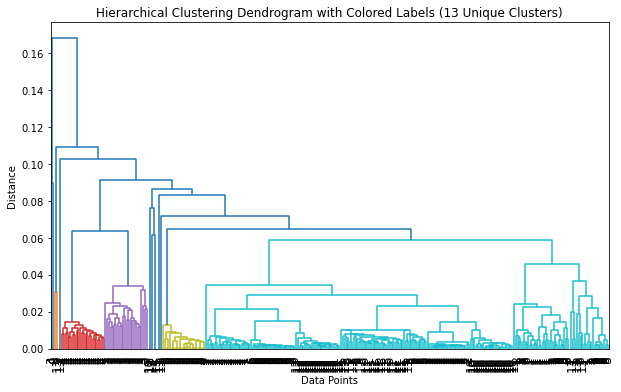

Best Color Threshold for 13 Unique Clusters: 0.060000000000000005
Cluster Labels: [12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12  8 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12  1  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6
  6  6  6  2  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5  5
  5  5  5  5 10 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12  3 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12  4 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11 11 11 11  7 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 10 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12 12 12 12 12 12 12 12 12

In [46]:
import os
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score

# Specify the directory containing your files
directory_path = "all_pd"

# Initialize the master list
master_list = []
labels_list = []  # List to store labels

# Iterate through each file in the directory
for i, filename in enumerate(os.listdir(directory_path)):
    if filename.endswith('.hist'):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Load the data from the file
        data = np.loadtxt(file_path)

        # Extract the second column into a list and append to the master list
        second_column = data[:, 1].tolist()
        master_list.append(second_column)

        # Assign labels based on the condition
        label = (i // 25) % 13 + 1
        labels_list.append(label)

# Convert the master list to a NumPy array
master_array = np.array(master_list)

# Perform hierarchical clustering
linkage_matrix = linkage(master_array, method='average')  # You can choose a different method

# Set initial values
best_color_threshold = None
best_clusters = None

# Vary the color threshold until 13 unique clusters are found
for color_threshold in np.linspace(0.01, 1.0, 100):  # Adjust the range and number of steps as needed
    # Get cluster labels based on the chosen color_threshold
    clusters = fcluster(linkage_matrix, t=color_threshold, criterion='distance')

    # Check the number of unique clusters
    unique_clusters = np.unique(clusters)
    
    # Update the best threshold if exactly 13 unique clusters are found
    if len(unique_clusters) == 13:
        best_color_threshold = color_threshold
        best_clusters = clusters
        break  # Exit the loop if the condition is met

# Plot the dendrogram with the best color threshold
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=labels_list, color_threshold=best_color_threshold, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram with Colored Labels (13 Unique Clusters)')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Display the best color threshold
print("Best Color Threshold for 13 Unique Clusters:", best_color_threshold)

# Display the cluster labels
print("Cluster Labels:", best_clusters)
print("# of Groups:", len(np.unique(best_clusters)))
matches = np.count_nonzero(np.array(labels_list) == np.array(best_clusters))
mismatches = np.array(labels_list).size - matches
print("Accuracy: ", matches/310.0)
